In [1]:
import os
import cv2
import pycolmap
from hloc.utils import viz_3d
import numpy as np
import pixtrack.utils.pose_utils as pose_utils
from pixloc.utils.colmap import Camera as ColCamera
from pixloc.pixlib.geometry import Camera as PixCamera, Pose
import matplotlib.pyplot as plt

In [8]:
sfm_path = '/data/aiscience/logs/sample_data/6111223687/max/ref/'
model = pycolmap.Reconstruction(sfm_path)
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(0,255,0,0.5)', name="reference", cameras=True)
fig.show()

In [ ]:
sfm_path = '/data/pixtrack/outputs/nerf_sfm/MotorCore_06June2022/sfm/'
model = pycolmap.Reconstruction(sfm_path)
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(0,255,0,0.5)', name="reference", cameras=False)
fig.show()

In [ ]:
from pixtrack.utils.ingp_utils import load_nerf2sfm, initialize_ingp, sfm_to_nerf_pose
from pixtrack.visualization.run_vis_on_poses import get_nerf_image
nerf_path = '/home/prajwal.chidananda/code/pixtrack/instant-ngp/snapshots/gimble_04MAR2022/weights.msgpack'
nerf2sfm_path = '/home/prajwal.chidananda/code/pixtrack/instant-ngp/data/nerf/gimble_04MAR2022/nerf2sfm.pkl'
nerf2sfm = load_nerf2sfm(nerf2sfm_path)
testbed = initialize_ingp(nerf_path)

In [ ]:
camera = model.cameras[1]
camera = ColCamera(None, 
                camera.model_name,
                int(camera.width),
                int(camera.height),
                camera.params)
camera = PixCamera.from_colmap(camera)

In [ ]:
image = model.images[165]
cIw = pose_utils.get_camera_in_world_from_colmap_image(image)
nerf_pose = sfm_to_nerf_pose(nerf2sfm, cIw)
nerf_img = get_nerf_image(testbed, nerf_pose, camera)
plt.imshow(nerf_img)

In [ ]:
path = os.path.join('../outputs/nerf_sfm/aug_gimble_04MAR2022/', image.name)
img = cv2.imread(path, -1)
plt.imshow(img)

In [5]:
from pixtrack.utils.hloc_utils import read_features

In [6]:
from pathlib import Path
from hloc.visualization import plot_images, read_image, plot_keypoints, plot_matches
from hloc.utils.io import get_keypoints, get_matches
output = Path('/data/aiscience/logs/sample_data/6111223687/max/')
features = output / 'features.h5'
matches = output / 'matches.h5'


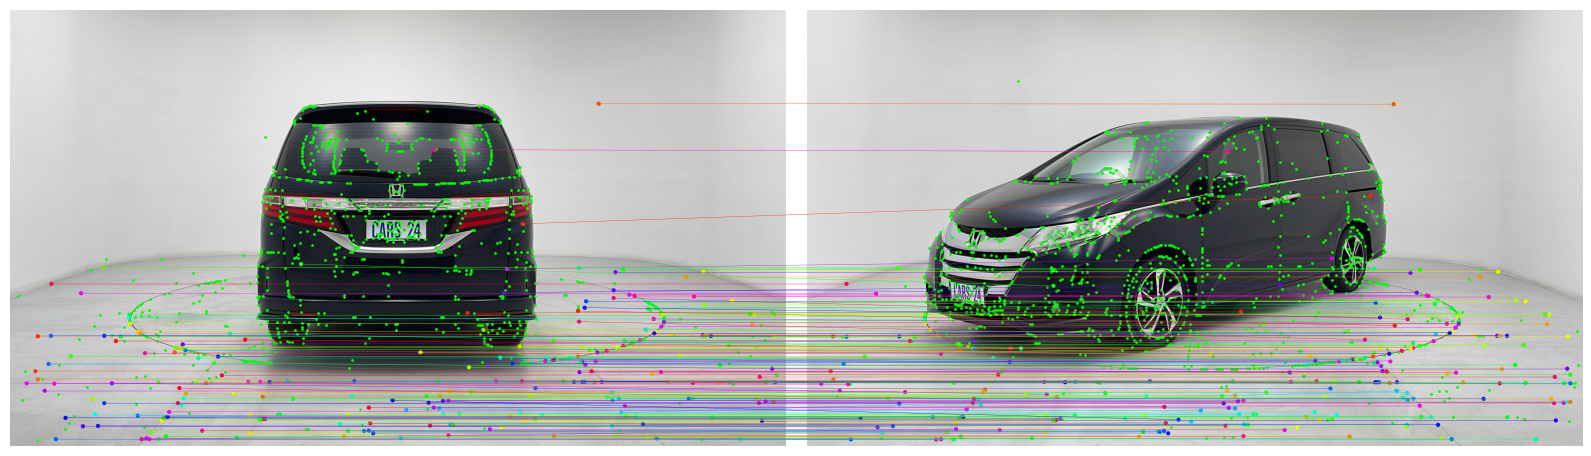

In [7]:
img_dir = "/data/aiscience/Sample_data/6111223687/"

image_name0 = 'mapping/6111223687-1.jpg'

image_path0 = os.path.join(img_dir, image_name0)
features_dict0 = read_features(features, image_name0)
img0 = read_image(image_path0)
kp0 = features_dict0['keypoints']
image_name1 = 'mapping/6111223687-46.jpg'
image_path1 =  os.path.join(img_dir, image_name1)
features_dict1 = read_features(features, image_name1)
img1 = read_image(image_path1)
kp1 = features_dict1['keypoints']

matches01 = get_matches(matches, image_name0, image_name1)
kp_m0 = kp0[matches01[0][:, 0]]
kp_m1 = kp1[matches01[0][:, 1]]

plot_images([img0, img1])
plot_keypoints([kp0, kp1])
plot_matches(kp_m0, kp_m1, lw=0.25)

In [ ]:
crop = [[450, 600], [2000, 3500]]
im2 = img0[crop[0][0]:crop[1][0], crop[0][1]:crop[1][1]]
plot_images([im2])